<a href="https://colab.research.google.com/github/jeroenvansweeveldt/Machine_Learning/blob/main/ml_exam_jeroenvansweeveldt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install Boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.7 MB/s 


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

import tensorflow as tf
from tensorflow.keras import layers
import random

np.random.seed(42)
tf.random.set_seed(42)

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
!ls drive

df = pd.read_csv('drive/MyDrive/University/depression.csv', encoding='UTF-8')

MyDrive


# 1 Preprocessing

In [13]:
df.head()

,AGERNG,GENDER,EDU,PROF,MARSTS,RESDPL,LIVWTH,ENVSAT,POSSAT,FINSTR,...,ANXI,DEPRI,ABUSED,CHEAT,THREAT,SUICIDE,INFER,CONFLICT,LOST,DEPRESSED
0,26-30,Female,Post Graduate,Unemployed,Unmarried,Town,With Family,Yes,Yes,No,...,Yes,No,No,No,No,No,No,Yes,No,0
1,26-30,Male,Post Graduate,Service holder (Private),Unmarried,City,With Family,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,Yes,No,No,1
2,21-25,Male,HSC,Student,Unmarried,City,With Family,Yes,Yes,No,...,Yes,Yes,No,No,No,No,No,No,No,0
3,16-20,Male,HSC,Student,Unmarried,City,With Family,No,Yes,No,...,Yes,Yes,No,Yes,No,No,No,No,No,1
4,21-25,Male,Graduate,Student,Unmarried,Town,With Family,No,Yes,Yes,...,Yes,Yes,No,No,No,No,Yes,Yes,No,1


Check for missing values:

In [14]:
df.isnull().sum()

AGERNG       0
GENDER       0
EDU          0
PROF         0
MARSTS       0
RESDPL       0
LIVWTH       0
ENVSAT       0
POSSAT       0
FINSTR       0
DEBT         0
PHYEX        0
SMOKE        0
DRINK        0
ILLNESS      0
PREMED       0
EATDIS       0
AVGSLP       0
INSOM        0
TSSN         0
WRKPRE       0
ANXI         0
DEPRI        0
ABUSED       0
CHEAT        0
THREAT       0
SUICIDE      0
INFER        0
CONFLICT     0
LOST         0
DEPRESSED    0
dtype: int64

In [15]:
for col in df:
    print(col,"\n",df[col].unique(),"\n")

AGERNG 
 ['26-30' '21-25' '16-20' '31-35' '46-50' '41-45' '56-60' '36-40' '61+'
 '51-55'] 

GENDER 
 ['Female' 'Male'] 

EDU 
 ['Post Graduate' 'HSC' 'Graduate' 'SSC'] 

PROF 
 ['Unemployed' 'Service holder (Private)' 'Student'
 'Service holder (Government)' 'Other' 'Businessman'] 

MARSTS 
 ['Unmarried' 'Married' 'Divorced'] 

RESDPL 
 ['Town' 'City' 'Village'] 

LIVWTH 
 ['With Family' 'Without Family'] 

ENVSAT 
 ['Yes' 'No'] 

POSSAT 
 ['Yes' 'No'] 

FINSTR 
 ['No' 'Yes'] 

DEBT 
 ['No' 'Yes'] 

PHYEX 
 ['Sometimes' 'Never' 'Regularly'] 

SMOKE 
 ['No' 'Yes'] 

DRINK 
 ['Yes' 'No'] 

ILLNESS 
 ['No' 'Yes'] 

PREMED 
 ['No' 'Yes'] 

EATDIS 
 ['No' 'Yes'] 

AVGSLP 
 ['More than 8 hours' '6 hours' '8 hours' '7 hours' '5 hours'
 'Below 5 hours'] 

INSOM 
 ['No' 'Yes'] 

TSSN 
 ['2-4 hours a day' '5-7 hours a day' '8-10 hours a day'
 'More than 10 hours a day' 'Less than 2 hours'] 

WRKPRE 
 ['No Pressure' 'Moderate' 'Mild' 'Severe'] 

ANXI 
 ['Yes' 'No'] 

DEPRI 
 ['No' 'Yes'] 

ABUSED

Apart from our label (DEPRESSED), all of the feature contain textual data (or a combination of strings and integers). Classical and neural machine learning algorithms covered in this course cannot work with textual data, so it must be converted to numerical data; as Sklearn's encoders transform data into floats, I will use these instead of strings.

There are a variety of ways to do this, but I will limit myself to techniques seen in the early ML classes (so no TF-IDF vectorizer, for instance).

In [16]:
df = df.replace({"Yes": 1.0, "No":0.0}).replace({"With Family": 1.0, "Without Family": 0.0}).replace({"Female":1.0, "Male":0.0})

df.head()

,AGERNG,GENDER,EDU,PROF,MARSTS,RESDPL,LIVWTH,ENVSAT,POSSAT,FINSTR,...,ANXI,DEPRI,ABUSED,CHEAT,THREAT,SUICIDE,INFER,CONFLICT,LOST,DEPRESSED
0,26-30,1.0,Post Graduate,Unemployed,Unmarried,Town,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,26-30,0.0,Post Graduate,Service holder (Private),Unmarried,City,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,21-25,0.0,HSC,Student,Unmarried,City,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,16-20,0.0,HSC,Student,Unmarried,City,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
4,21-25,0.0,Graduate,Student,Unmarried,Town,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1


Some of the features have an ordered relationship, so ordinally encoding these might be desirable. However, when we look at the categories listed above, the sequence is disordered, so we must assign floats to the labels. For a reason I didn't decipher, Sklearn's ordinal decoder was throwing a ValueError (code in the appendix). By that time, assigning these floats manually wasn't much work.

In [17]:
df.EDU.replace({"Post Graduate": 0.0, "Graduate": 1.0, "HSC": 2.0, "SSC": 3.0}, inplace=True)
df.PHYEX.replace({"Regularly": 0.0, "Sometimes": 1.0, "Never": 2.0}, inplace=True)
df.AVGSLP.replace({"More than 8 hours": 0.0, "8 hours": 1.0, "7 hours": 2.0,
                  "6 hours": 3.0, "5 hours": 4.0, "Below 5 hours": 5.0}, inplace=True)
df.TSSN.replace({"Less than 2 hours": 0.0, "2-4 hours a day": 1.0, "5-7 hours a day": 2.0,
                 "8-10 hours a day": 3.0, "More than 10 hours a day": 4.0}, inplace=True)
df.WRKPRE.replace({"No Pressure": 0.0, "Mild": 1.0, "Moderate": 2.0, "Severe": 3.0}, inplace=True)

df.head()

,AGERNG,GENDER,EDU,PROF,MARSTS,RESDPL,LIVWTH,ENVSAT,POSSAT,FINSTR,...,ANXI,DEPRI,ABUSED,CHEAT,THREAT,SUICIDE,INFER,CONFLICT,LOST,DEPRESSED
0,26-30,1.0,0.0,Unemployed,Unmarried,Town,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,26-30,0.0,0.0,Service holder (Private),Unmarried,City,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,21-25,0.0,2.0,Student,Unmarried,City,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,16-20,0.0,2.0,Student,Unmarried,City,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
4,21-25,0.0,1.0,Student,Unmarried,Town,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1


The remainder of the features don't seem to imply an ordered relationship, so we'll one-hot encode those.

In [18]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
feat_arr = cat_encoder.fit_transform(df[["AGERNG", "PROF", "MARSTS", "RESDPL"]]).toarray()

In [19]:
cat_encoder.categories_

[array(['16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50',
        '51-55', '56-60', '61+'], dtype=object),
 array(['Businessman', 'Other', 'Service holder (Government)',
        'Service holder (Private)', 'Student', 'Unemployed'], dtype=object),
 array(['Divorced', 'Married', 'Unmarried'], dtype=object),
 array(['City', 'Town', 'Village'], dtype=object)]

In [20]:
feat_labels = cat_encoder.categories_

# flatten the array so we can use them as headers in the dataframe
feat_labels = np.hstack(feat_labels)

In [21]:
enc_feat = pd.DataFrame(feat_arr, columns=feat_labels)

In [22]:
df_new = pd.concat([enc_feat, df], axis=1)
df_new.drop(df_new[["AGERNG", "PROF", "MARSTS", "RESDPL"]], axis=1, inplace=True)
df_new.head()

,16-20,21-25,26-30,31-35,36-40,41-45,46-50,51-55,56-60,61+,...,ANXI,DEPRI,ABUSED,CHEAT,THREAT,SUICIDE,INFER,CONFLICT,LOST,DEPRESSED
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1


#1.2 Feature selection
Let's split our features (X) and labels (y).

In [23]:
X = df_new.drop("DEPRESSED", axis=1)
y = df_new["DEPRESSED"]

In [24]:
from sklearn.model_selection import train_test_split

X_tra, X_val, y_tra, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

I will test two feature selection techniques given in the paper to calculate which features are useful for our model. One is Sklearn's SelectKBest feature selector, the other one is Boruta.

In [25]:
from sklearn.feature_selection import SelectKBest, chi2

best_feat = SelectKBest(score_func=chi2, k=10)
scorefit = best_feat.fit(X_tra, y_tra)

df_scores = pd.DataFrame(scorefit.scores_)
df_columns = pd.DataFrame(X_tra.columns)

feat_scores = pd.concat([df_columns, df_scores], axis=1)
feat_scores.columns = ["Feature", "Score"]

feat_scores.sort_values("Score", ascending=False)

,Feature,Score
40,DEPRI,59.015436
45,INFER,52.143921
39,ANXI,43.443699
26,POSSAT,40.692408
42,CHEAT,39.924218
41,ABUSED,39.153504
46,CONFLICT,38.267701
44,SUICIDE,22.880168
43,THREAT,22.526177
47,LOST,18.792395


Boruta works as a wrapper around a RandomForest algorithm and will iteratively select important features by eliminating those which it deems irrelevant. The features will be ranked based on importance (1 being important, with higher n indicating decreased relevance).

In [26]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

forest = RandomForestClassifier(max_depth=5, random_state=42)

feat_names = np.array(X.columns)
feat_select = BorutaPy(forest, n_estimators="auto", random_state=42)

feat_select.fit(X_tra.to_numpy(), y_tra.to_numpy())

X_filtered = feat_select.transform(X_tra.to_numpy())

feat_ranks = list(zip(feat_names,
                         feat_select.ranking_,
                         feat_select.support_))

df_rank = pd.DataFrame(feat_ranks, columns=["Feature", "Ranking", "Useful?"])
df_rank.sort_values("Ranking")

,Feature,Ranking,Useful?
47,LOST,1,True
26,POSSAT,1,True
27,FINSTR,1,True
37,TSSN,1,True
25,ENVSAT,1,True
39,ANXI,1,True
46,CONFLICT,1,True
41,ABUSED,1,True
42,CHEAT,1,True
43,THREAT,1,True


As the Boruta algorithm yielded more accurate results according to the paper, I will isolate the features it ranked as useful into a new dataframe.

In [27]:
X = df_new[["LOST", "POSSAT", "FINSTR", "TSSN", "ENVSAT", "ANXI", "CONFLICT", "ABUSED", "CHEAT", "THREAT", "INFER", "DEPRI"]]
       
X

,LOST,POSSAT,FINSTR,TSSN,ENVSAT,ANXI,CONFLICT,ABUSED,CHEAT,THREAT,INFER,DEPRI
0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2,0.0,1.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
599,1.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
600,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
601,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
602,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((543, 12), (61, 12), (543,), (61,))

Let's check the dataset's balance.

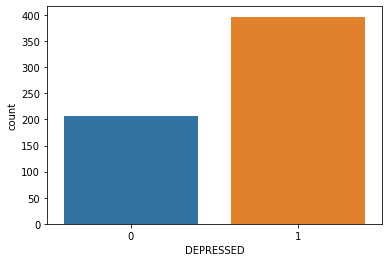

In [29]:
sns.countplot(x="DEPRESSED", data=df)

Using smote,  I downsampled the dataset to balance it out (downsampling would yield better results than upsampling: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)

In [30]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [31]:
np.bincount(y_res)

array([363, 363])

#2 Classical classifier

The model I wish to use is Gradient Boosting.

In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix

The dataset doesn't contain any missing values, so there is no use to implement the KNN Imputer. Furthermore, as Gradient Boosting belongs to the family of Decision Tree-based algorithms, they never use multiple features at the same time, making feature scaling not necessary, unlike in other Machine Learning algorithms (Géron, p.725).

In [33]:
booster = GradientBoostingClassifier(random_state=42)

In [34]:
booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Set up a grid search.

In [35]:
param_grid = {"n_estimators": [30, 50, 60, 100],
              "learning_rate": [0.05, 0.1, 0.2, 0.25, 0.3],
              "max_depth": [3, 4, 5]}

In [36]:
gs = GridSearchCV(booster, param_grid, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)

We fit the data not to the original train data, but to the resized data performed by SMOTE.

In [37]:
gs.fit(X_res, y_res)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2, 0.25, 0.3],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [30, 50, 60, 100]},
             scoring='f1_macro', verbose=1)

In [38]:
gs.best_score_

0.9047997448181381

In [39]:
gs.best_estimator_

GradientBoostingClassifier(learning_rate=0.25, n_estimators=60, random_state=42)

In [40]:
predictions = gs.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.88      0.85      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


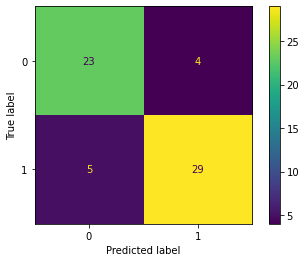

In [41]:
plot_confusion_matrix(gs, X_test, y_test);

#2.1 Error analysis

Let's plot the value of importance the model had given to the features.

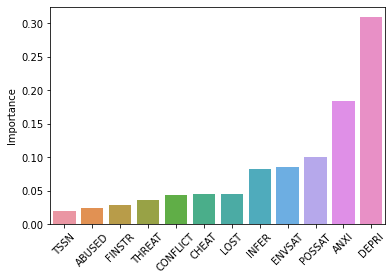

In [42]:
feat_import = gs.best_estimator_.feature_importances_
import_feat = pd.DataFrame(index=X.columns, data=feat_import, columns=["Importance"])
import_feat = import_feat.sort_values("Importance")

sns.barplot(data=import_feat, x=import_feat.index, y="Importance")
plt.xticks(rotation=45);

We'll separate the errors the model made from the correct predictions it performed.

In [43]:
x_error = X_test[predictions != y_test]
y_error = y_test[predictions != y_test]
p_error = predictions[predictions != y_test]

x_correct = X_test[predictions == y_test]
y_correct = y_test[predictions == y_test]
p_correct = predictions[predictions == y_test]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

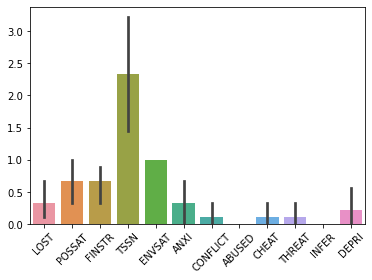

In [44]:
sns.barplot(data=x_error)
plt.xticks(rotation=45)

The above plot shows that TSSN had the most weight in making incorrect predictions. Possibly this is due to fact that it was ordinally encoded; with higher ranking numbers putting more weight in the overall decision to label a person as depressed or not.

# Appendix

In [ ]:
#the categories are too disorderded for ordinal encoding, so let's rearrange them

agerng = ['16-20','21-25', '26-30', '31-35', '36-40',
          '41-45', '46-50','51-55', '56-60', '61+']
edu = ['Post Graduate', 'Graduate', 'HSC', 'SSC']
prof = ['Other', 'Businessman', 'Service holder (Private)',
        'Service holder (Government)', 'Student', 'Unemployed']
marsts = ['Married', 'Unmarried', 'Divorced']
resdpl = ['City', 'Town', 'Village']
phyex = ['Regularly', 'Sometimes' 'Never']
avgslp = ['More than 8 hours', '8 hours', '7 hours',
          '6 hours', '5 hours', 'Below 5 hours']
tssn = ['Less than 2 hours', '2-4 hours a day', '5-7 hours a day',
        '8-10 hours a day', 'More than 10 hours a day']
wrkpre = ['No Pressure', 'Mild', 'Moderate', 'Severe']


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

cat_encoder = OrdinalEncoder(categories=[edu, phyex, avgslp, tssn, wrkpre])

In [ ]:
df[["EDU", "PHYEX", "AVGSLP", "TSSN", "WRKPRE"]] = cat_encoder.fit_transform(df[["EDU",
                                                    "PHYEX", "AVGSLP", "TSSN", "WRKPRE"]])

ValueError: ignored

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

cat_encoder = OrdinalEncoder()


df[["AGERNG","EDU","PROF", "MARSTS", "RESDPL","PHYEX",
    "AVGSLP","TSSN","WRKPRE"]] = cat_encoder.fit_transform(df[["AGERNG","EDU",
                                                            "PROF", "MARSTS", "RESDPL",
                                                            "PHYEX","AVGSLP","TSSN","WRKPRE"]])


,AGERNG,GENDER,EDU,PROF,MARSTS,RESDPL,LIVWTH,ENVSAT,POSSAT,FINSTR,...,ANXI,DEPRI,ABUSED,CHEAT,THREAT,SUICIDE,INFER,CONFLICT,LOST,DEPRESSED
0,2.0,1.0,2.0,5.0,2.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,2.0,0.0,2.0,3.0,2.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,1.0,0.0,1.0,4.0,2.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,1.0,4.0,2.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
4,1.0,0.0,0.0,4.0,2.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1


In [ ]:
df_feat = df[["AGERNG","EDU","PROF", "MARSTS", "RESDPL","PHYEX","AVGSLP","TSSN","WRKPRE"]]
df_feat.head()

,AGERNG,EDU,PROF,MARSTS,RESDPL,PHYEX,AVGSLP,TSSN,WRKPRE
0,26-30,Post Graduate,Unemployed,Unmarried,Town,Sometimes,More than 8 hours,2-4 hours a day,No Pressure
1,26-30,Post Graduate,Service holder (Private),Unmarried,City,Never,6 hours,5-7 hours a day,Moderate
2,21-25,HSC,Student,Unmarried,City,Never,8 hours,8-10 hours a day,Mild
3,16-20,HSC,Student,Unmarried,City,Sometimes,7 hours,2-4 hours a day,Severe
4,21-25,Graduate,Student,Unmarried,Town,Never,7 hours,5-7 hours a day,Mild


In [ ]:
X = new_df.drop("DEPRESSED", axis=1)
y= new_df["DEPRESSED"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, shuffle=True, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((483, 65), (121, 65), (483,), (121,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

logreg = LogisticRegression(C=1, random_state=42)
logreg.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1, random_state=42)>

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'logisticregression__C': [0.01, 0.1, 1.0, 10, 100],
    'logisticregression__penalty': ["l2", "none"], #elasticnet is not supported by the default lbfgs solver
    'logisticregression__multi_class': ["auto", "ovr"],
    
    'gradientboostingclassifier__n_estimators': [50, 100],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [3, 4, 5] 
    }]

In [ ]:
# Scaling numeric values
from sklearn.preprocessing import StandardScaler
# Machine Learning algorithm
from sklearn.linear_model import LogisticRegression   
# Evaluating
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
logreg = LogisticRegression(random_state=42)

pipe = make_pipeline(scaler, logreg)

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [ ]:
predictions = pipe.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        44
           1       0.93      0.92      0.93        77

    accuracy                           0.91       121
   macro avg       0.90      0.90      0.90       121
weighted avg       0.91      0.91      0.91       121

